# TSF GRIP INTERNSHIP FROM AUGUST 7TH TO SEPTEMBER 7TH 2020

# DATA SCIENCE TASK 2

**In this regression task we will predict the percentage of marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear regression task as it involves just two variables.**

## We will import required python packages and perform data analysis:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('supervisedml.xlsx')
print(data.head(5))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## To find the Statistical Details of our DataFrame ("data") using the describe() function:

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization from above statistical analysis:

In [6]:
from scipy import stats

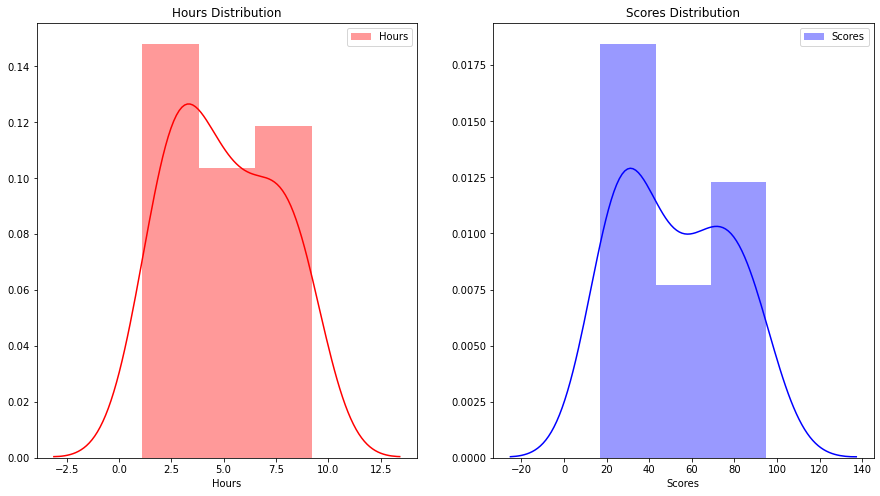

In [8]:
graph=plt.figure(figsize=(15,8))
g1=graph.add_subplot(121)
g2=graph.add_subplot(122)
g1.set_title('Hours Distribution')
g2.set_title('Scores Distribution')
p1=sns.distplot(data['Hours'],label='Hours',ax=g1,color='red')
p2=sns.distplot(data['Scores'],label='Scores',ax=g2,color='blue')
p1.legend()
p2.legend()

## Visualization of Relationships between the 2 variables:

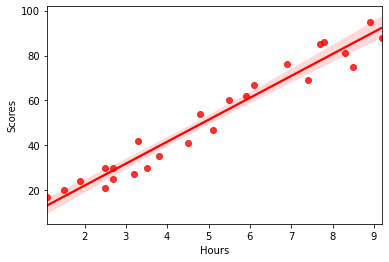

In [11]:
sns.regplot(x=data['Hours'],y=data['Scores'],color='red')

## Segregating the dependent variable from the independent variable:

In [12]:
X = data.iloc[:, :-1]
y=data.iloc[:, 1]

## Train and test data_sets to be created:

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train the ML Model:

In [16]:
from sklearn.linear_model import LinearRegression  
model =LinearRegression()
model.fit(X_train,y_train)
print("Training complete.")

Training complete.


## Making predictions using this linear regression model:

In [21]:
predictions1=model.predict(X_test)
predictions1

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Testing model's accuracy:

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE1=mean_absolute_error(predictions1,y_test)
RMSE1=np.sqrt(mean_squared_error(y_test,predictions1))
print('Mean Absolute error in Linear Regressor Model :',MAE1.round(2))
print('Root Mean Squared Error in Linear Regressor Model :',RMSE1.round(2))

Mean Absolute error in Linear Regressor Model : 4.18
Root Mean Squared Error in Linear Regressor Model : 4.65


### Actual_value vs Predicted_value (to check for errors in output of our model post training and testing)

In [53]:
data1 = pd.DataFrame({'Actual' : y_test , 'Predicted' : predictions1})
data1.reset_index(drop=True,inplace=True)
data1['Predicted']=predictions1
data1['Deviation']=abs(data1['Actual']-data1['Predicted'])
data1

,Actual,Predicted,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


## Visualizing the deviation of data between the actual and predicted values by LinearRegression Model

Text(0.5, 1.0, 'Deviation In Actual v/s Predicted Values(Simple Linear Regression)')

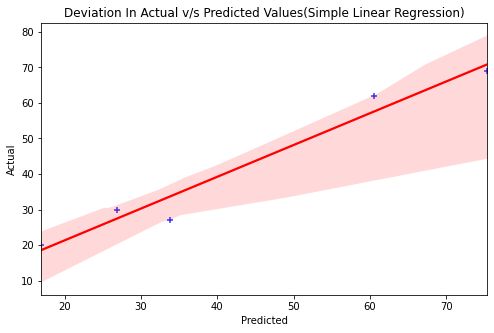

In [61]:
plt.figure(figsize=(8,5))
sns.regplot('Predicted','Actual',data=check,line_kws={'color':'red'},scatter_kws={'color':'blue'},marker='+')
plt.title('Deviation In Actual v/s Predicted Values(Simple Linear Regression)')

## Enter the no. of study hours to predict the result:

In [62]:
n=float(input())
result=model.predict([[n]])
print("After studying for {} hours, The Expected Score Should be {}".format(n,result.round(2)))

9.25
After studying for 9.25 hours, The Expected Score Should be [93.69]


# Conclusion

In this regression task we have predicted the percentage of marks that a student is expected to score based upon the
number of hours they studied. This was a simple linear regression task as it involves just two variables. We have successfully deduced that if a student studies for 9.25 hours a day the his predicted scores will be 93.69%